# Tarea 1 Parte 2
Dada una imagen *f* en escala de grises:

## 1) Calcular los bordes usando la magnitud del gradiente. Obtener resultados para diferentes valores de umbral aplicando la magnitud del gradiente.

Para el caso 2D, el gradiente es el vector que se compone de las derivadas en cada dimensión, es el cambio que hay sobre las intensidades a lo largo de las columnas y las filas de la imagen. 
$$ \nabla f(x, y) = (f_x(x, y), f_y (x, y))  $$ 
con 
$$f'(x) = \frac{df(x)}{dx} = f_x (x).$$

Aproximaremos las primeras derivadas de la siguiente manera 
$$g_x (x, y) \approx f(x + 1, y) - f(x -1, y),$$ 
$$g_y (x, y) \approx f(x, y + 1) - f(x, y - 1) $$

Calcularemos dichas derivadas con una ventana de $3\times 3$ y aplicando una correlación con la imagen
$$g_x = f \otimes K_x$$
$$g_y = f \otimes K_y$$
donde
$$
K_x =
\begin{pmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{pmatrix}
\qquad
K_y =
\begin{pmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{pmatrix}
$$

Siendo estos Kernels de Sobel.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [2]:
def bordes(img, umbral):
    ##Dada la imagen f
    #1) Calculamos la magnituded del graidente para cada pixel
    height, width = img.shape
    k_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
    
    k_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])
    
    gx = np.zeros((height-2, width-2))
    gy = np.zeros((height-2, width-2))
    #para procesar los bordes, consideraremos que la imagen es circular
    img_padded = np.pad(img, pad_width=1, mode='wrap')
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            region = img_padded[i-1:i+2, j-1:j+2]
            gx[i-1, j-1] = np.sum(region * k_x)
            gy[i-1, j-1] = np.sum(region * k_y)
    
            
    magnitud_gradiente = np.sqrt(gx**2 + gy**2)
    #vamos a normalizar la magnitud gradiente
    magnitud_gradiente = magnitud_gradiente / np.max(magnitud_gradiente) * 255
    
    #luego aplicaremos un umbral sobre la magnitud_gradiente
    magnitud_gradiente[magnitud_gradiente > umbral] = 255
    magnitud_gradiente[magnitud_gradiente <= umbral] = 0
    return magnitud_gradiente
    

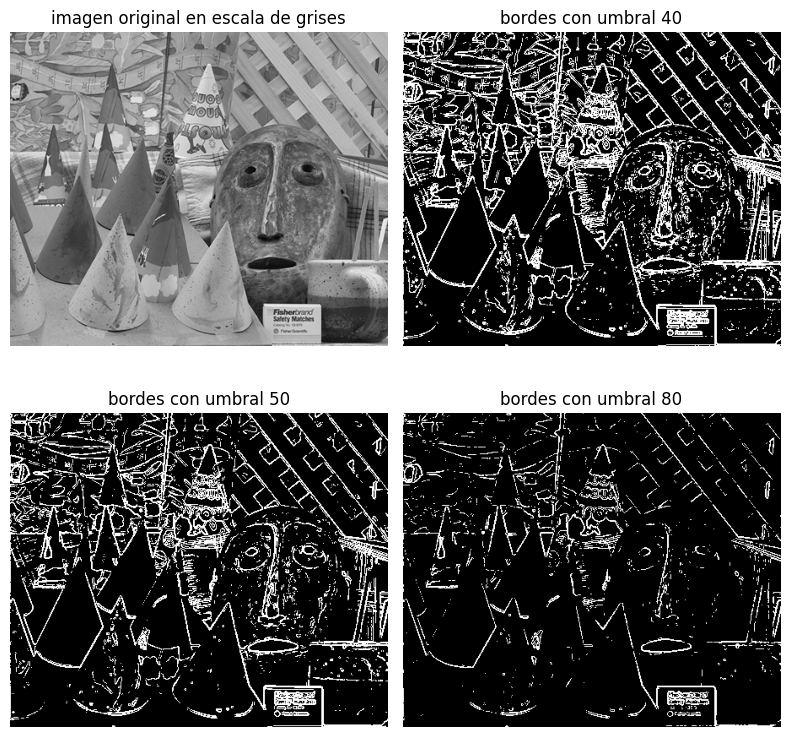

In [3]:
img = cv2.imread('im2.png', cv2.IMREAD_GRAYSCALE)
bordes_img = bordes(img, 40)
bordes_img2 = bordes(img, 50)
bordes_img3 = bordes(img, 80) 

plt.figure(figsize=(8, 8))

#imagen original
plt.subplot(2, 2, 1) #1 fila, 2 columnas, primera imagen
plt.imshow(img, cmap='gray')
plt.title("imagen original en escala de grises")
plt.axis('off')

#imagen con bordes
plt.subplot(2, 2, 2) #1 fila, 2 columnas, segunda imagen
plt.imshow(bordes_img, cmap='gray')
plt.title("bordes con umbral 40")
plt.axis('off')

plt.subplot(2, 2, 3) #1 fila, 2 columnas, segunda imagen
plt.imshow(bordes_img2, cmap='gray')
plt.title("bordes con umbral 50")
plt.axis('off')

plt.subplot(2, 2, 4) #1 fila, 2 columnas, segunda imagen
plt.imshow(bordes_img3, cmap='gray')
plt.title("bordes con umbral 80")
plt.axis('off') 



plt.tight_layout()
plt.show()


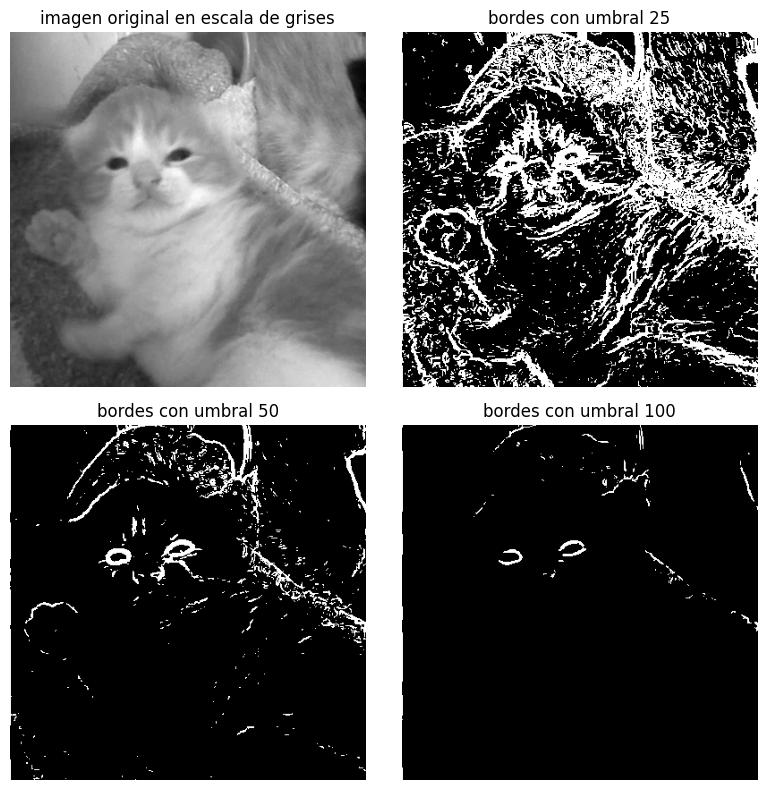

In [4]:
img2 = cv2.imread('gatitogordito.jpg', cv2.IMREAD_GRAYSCALE)
bordes_img22 = bordes(img2, 10)
bordes_img23 = bordes(img2, 25)
bordes_img24 = bordes(img2, 50)

plt.figure(figsize=(8, 8))

#imagen original
plt.subplot(2, 2, 1) 
plt.imshow(img2, cmap='gray')
plt.title("imagen original en escala de grises")
plt.axis('off')

#imagen con bordes
plt.subplot(2, 2, 2) 
plt.imshow(bordes_img22, cmap='gray')
plt.title("bordes con umbral 25")
plt.axis('off')

plt.subplot(2, 2, 3) 
plt.imshow(bordes_img23, cmap='gray')
plt.title("bordes con umbral 50")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(bordes_img24, cmap='gray')
plt.title("bordes con umbral 100")
plt.axis('off')



plt.tight_layout()
plt.show()


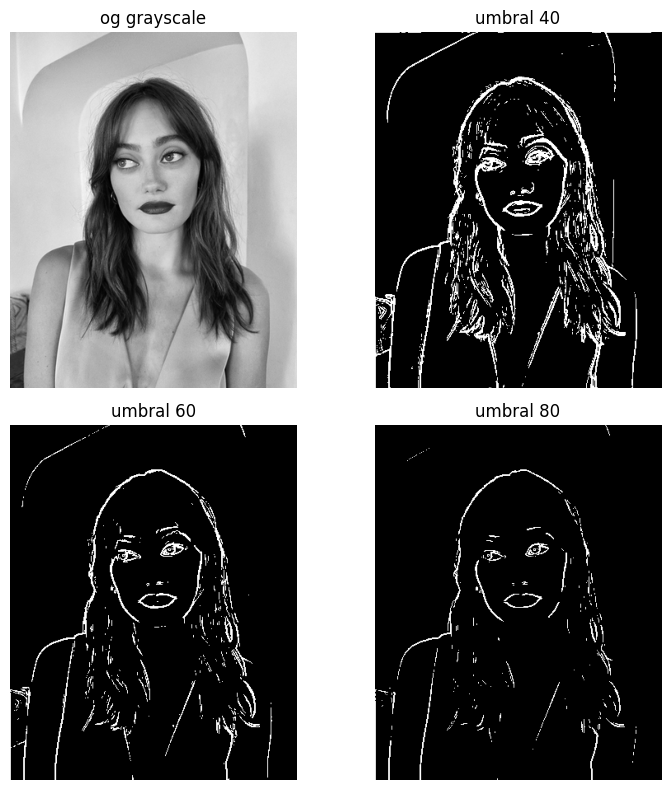

In [5]:
img3 = cv2.imread('ellapurnell.png', cv2.IMREAD_GRAYSCALE)
bordes_img3 = bordes(img3, 40)
bordes_img32 = bordes(img3, 60)
bordes_img33 = bordes(img3, 80)

plt.figure(figsize=(8, 8))

#imagen original
plt.subplot(2, 2, 1) 
plt.imshow(img3, cmap='gray')
plt.title("og grayscale")
plt.axis('off')

#imagen con bordes
plt.subplot(2, 2, 2) 
plt.imshow(bordes_img3, cmap='gray')
plt.title("umbral 40")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(bordes_img32, cmap='gray')
plt.title("umbral 60")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(bordes_img33, cmap='gray')
plt.title("umbral 80")
plt.axis('off')

plt.tight_layout()
plt.show()


## 2) Implementar el algoritmo del umbral adaptativo de Bradey & Rothpara para convertir la imagen *f* en una imagen binaria.

- **a.** Sin considerar la imagen integral.  
- **b.** Considerando la imagen integral.  
- **c.** Comparar tiempos de procesamiento entre las versiones a) y b).  
- **d.** Comparar el resultado con el algoritmo de Otsu (este algoritmo no es necesario implementarlo).


Creamos una matriz llamada prueba, la cual aparece en las diapositivas de las notas de la clase cuando se presenta la imagen integral, esta la usamos para probar nuestras funciones de Imagen Integral y de Umbral Adaptativo.

# Imagen Integral.
Se presental el código para el cálculo de la imagen integral.
Está hecho tal cual el pseudocódigo que se dio en clase.

Calcular la imagen integral (integral image o summed-area table) de una imagen en escala de grises. Esta estructura permite obtener la suma de los valores de un rectángulo arbitrario de la imagen original en tiempo constante.

Para cada píxel $(i,j)$, la imagen integral almacena la suma de todos los píxeles arriba y a la izquierda (incluyendo el propio):
$$
\text{intImg}(i + 1, j + 1) = \sum_{y=0}^{i} \sum_{x=0}^{j} \text{img}(y, x)
$$


La imagen se crea de tamaño $(h+1) \times (w+1)$ para facilitar los cálculos de los bordes (y así evitar errores)

In [6]:
def imagen_integral(img):
    height, width = img.shape
    intImg = np.zeros((height + 1, width +1), dtype=np.float64)
    # Construcción de la imagen integral exactamente como en el paper
    for i in range(height):
        suma_filas = 0.0
        for j in range(width):
            suma_filas += img[i, j]
            if i == 0:
                intImg[i+1, j+1] = suma_filas
            else:
                intImg[i+1, j+1] = suma_filas + intImg[i, j + 1]
    return intImg

In [7]:
prueba = np.array([[1, 3, 2, 4, 6], 
                   [2, 4, 3, 1, 3],
                   [2, 1, 3, 5, 2], 
                   [4, 5, 2, 4, 1],
                   [1, 2, 4, 6, 3]])

In [8]:
integral_matriz_prueba = imagen_integral(prueba.T)
print("la matriz original es:")
print(prueba.T)
print("la matriz integral es:")
print(integral_matriz_prueba)

la matriz original es:
[[1 2 2 4 1]
 [3 4 1 5 2]
 [2 3 3 2 4]
 [4 1 5 4 6]
 [6 3 2 1 3]]
la matriz integral es:
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  3.  5.  9. 10.]
 [ 0.  4. 10. 13. 22. 25.]
 [ 0.  6. 15. 21. 32. 39.]
 [ 0. 10. 20. 31. 46. 59.]
 [ 0. 16. 29. 42. 58. 74.]]


# Umbral Adaptativo
Se presenta el código para el cálculo de la imagen binaria con el método de Umbral Adaptativo presentado por Bradley & Roth en el año 2007, en el Journal of Graphics Tools.

El Umbral Adaptativo calcula el umbral local basado en el promedio de los valores alrededor del pixel.

El pseudocódigo está implementado tal cual las notas de clase, pero al igual que el código del cálculo de la imagen integral, los índices están desplazados en 1 a la derecha para adaptarse a los contadores de Python.

Además se agrega la revisión de bordes tomando `x1 = int(max((j - (s // 2)), 0))`, ` x2 = int(min((j + (s // 2)), ancho - 1))` y sus respectivos para `y1` y `y2`.



In [9]:
def umbral_adaptativo_(img, intImg, t):
    altura, ancho = img.shape
    out = np.zeros((altura , ancho), dtype=np.uint8)
    s = (ancho // 8 )
    
    for j in range(ancho):  
        for i in range(altura):
            suma = 0.0
            x1 = int(max((j - (s // 2)), 0))
            x2 = int(min((j + (s // 2)), ancho - 1))
            y1 = int(max((i - (s // 2)), 0))
            y2 = int(min((i + (s // 2)), altura - 1)) 
            
            area = (x2 - x1 + 1) * (y2 - y1 + 1)
            
            #suma =intImg[x2 + 1, y2 + 1] - intImg[x1, y2 + 1] - intImg[x2 + 1, y1] + intImg[x1, y1]
            suma = intImg[y2 + 1, x2 + 1] - intImg[y1, x2 + 1] - intImg[y2 + 1, x1] + intImg[y1, x1]
            umbral = (suma / area) * (100 - t) / 100

            if img[i, j] <= umbral:
                out[i, j] = 0
            else:
                out[i, j] = 255

    return out


[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  3.  5.  9. 10.]
 [ 0.  4. 10. 13. 22. 25.]
 [ 0.  6. 15. 21. 32. 39.]
 [ 0. 10. 20. 31. 46. 59.]
 [ 0. 16. 29. 42. 58. 74.]]


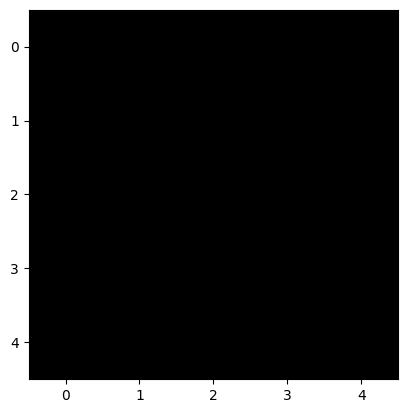

In [10]:
imagen_integral_prueba = imagen_integral(prueba.T)
print(imagen_integral_prueba)
umbral_adaptativo_prueba = umbral_adaptativo_(prueba.T, imagen_integral_prueba, 15)
plt.imshow(umbral_adaptativo_prueba, cmap='gray')
plt.show()

# Umbral Adaptativo sin Imagen Integral

Para este caso en vez de usar primero la función de imagen integral, se agregó un doble for después de los cálculos de `x1`,  `y1`,  `x2`, `y2`. Para procesar los píxeles uno por uno a nivel vecindad, esto nos causará tiempos de ejecución más largos, pero más adelante se podrá ver las comparaciones de tiempos con algunos ejemplos. 

In [11]:
def umbral_adaptativo_sin_integral(img, t):
    altura, ancho = img.shape
    out = np.zeros((altura , ancho), dtype=np.uint8)
    s = (ancho // 8 )
    
    for j in range(ancho):  
        for i in range(altura):
            suma = 0.0
            x1 = int(max((j - (s // 2)), 0))
            x2 = int(min((j + (s // 2)), ancho - 1))
            y1 = int(max((i - (s // 2)), 0))
            y2 = int(min((i + (s // 2)), altura - 1)) 
            
            #aquí va nuestro doble for para calcular sin la imagen integral
            for y in range(y1, y2 + 1):
                for x in range(x1, x2 + 1):
                    suma += img[y, x]
            area = (x2 - x1 + 1) * (y2 - y1 + 1)
            
            #suma =intImg[x2 + 1, y2 + 1] - intImg[x1, y2 + 1] - intImg[x2 + 1, y1] + intImg[x1, y1]
            #suma = intImg[y2 + 1, x2 + 1] - intImg[y1, x2 + 1] - intImg[y2 + 1, x1] + intImg[y1, x1]
            umbral = (suma / area) * (100 - t) / 100

            if img[i, j] <= umbral:
                out[i, j] = 0
            else:
                out[i, j] = 255

    return out

Ejecución de la función `umbral_adaptativo_sin_integral` para la matriz `prueba.T `.

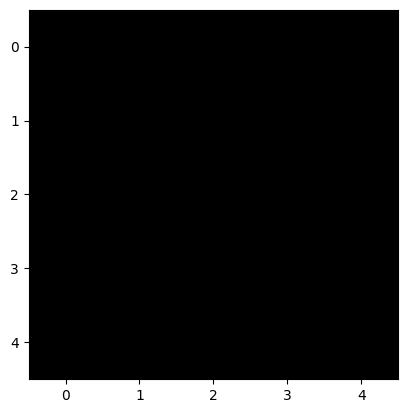

In [12]:
sin_umbral_integral_matriz_prueba = umbral_adaptativo_sin_integral(prueba.T, 15)
plt.imshow(sin_umbral_integral_matriz_prueba, cmap='gray')

# Ejemplos.
A partir de aquí e mostrarán algunos ejemplos y sus comparaciones de tiempos para:
- **1.**  Umbral Adaptativo con Imagen Integral
- **2.**  Umbral Adaptativo sin Imagen Integral
- **3.**  Método de Otsu.

Los tiempos se tomarán con la librería `time`.

In [13]:
from time import time

El tiempo que tarda la imagen integral de la imagen prueba.T es: 0.0000 segundos
El tiempo que tarda la imagen integral de la matriz prueba.T es: 0.0000 segundos
El tiempo que tarda la imagen integral de la matriz prueba.T es: 0.0010 segundos


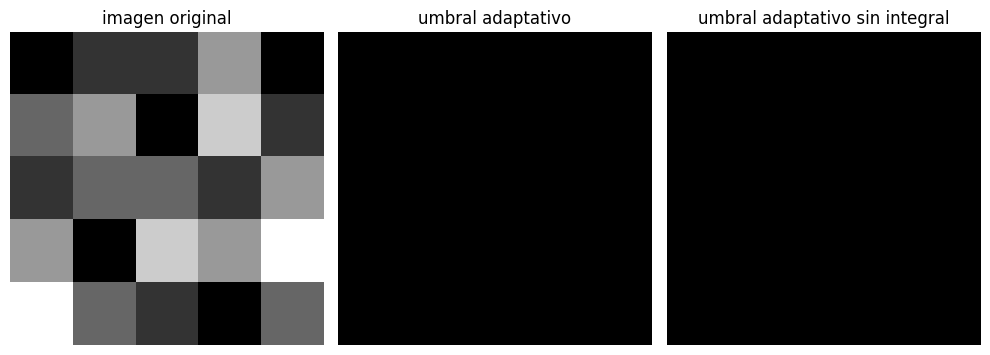

In [14]:
#aquí va la prueba con la matriz prueba
tiempo_inicio = time()
imagen_integral_matriz = imagen_integral(prueba.T)
tiempo_final = time()
print(f"El tiempo que tarda la imagen integral de la imagen prueba.T es: {tiempo_final - tiempo_inicio:.4f} segundos")

#print(imagen_integral_im2)
tiempo_inicio = time()
umbral_adaptativo_matriz = umbral_adaptativo_(prueba.T, imagen_integral_matriz, 15)
tiempo_final = time()
print(f"El tiempo que tarda la imagen integral de la matriz prueba.T es: {tiempo_final - tiempo_inicio:.4f} segundos")

tiempo_inicio = time()
sin_imagen_integral_matriz = umbral_adaptativo_sin_integral(prueba.T, 15)
tiempo_final = time()
print(f"El tiempo que tarda la imagen integral de la matriz prueba.T es: {tiempo_final - tiempo_inicio:.4f} segundos")



plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(prueba.T, cmap='gray')
plt.title("imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(umbral_adaptativo_matriz, cmap='gray')
plt.title("umbral adaptativo")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sin_imagen_integral_matriz, cmap='gray')
plt.title("umbral adaptativo sin integral") 
plt.axis('off')



plt.tight_layout()
plt.show()

El tamaño de la imagen panel_chiquito.jpg es: (436, 424) pixeles.
El tiempo que tarda la imagen integral de la imagen panel chiquito es: 0.0948 segundos
El tiempo que tarda el umbral adaptativo de la imagen panel chiquito es: 0.3757 segundos
El tiempo que tarda el umbral adaptativo sin imagen integral de la imagen panel chiquito es: 93.6154 segundos
El tiempo que tarda lel método de Otsu de la imagen panel chiquito es: 0.0867 segundos


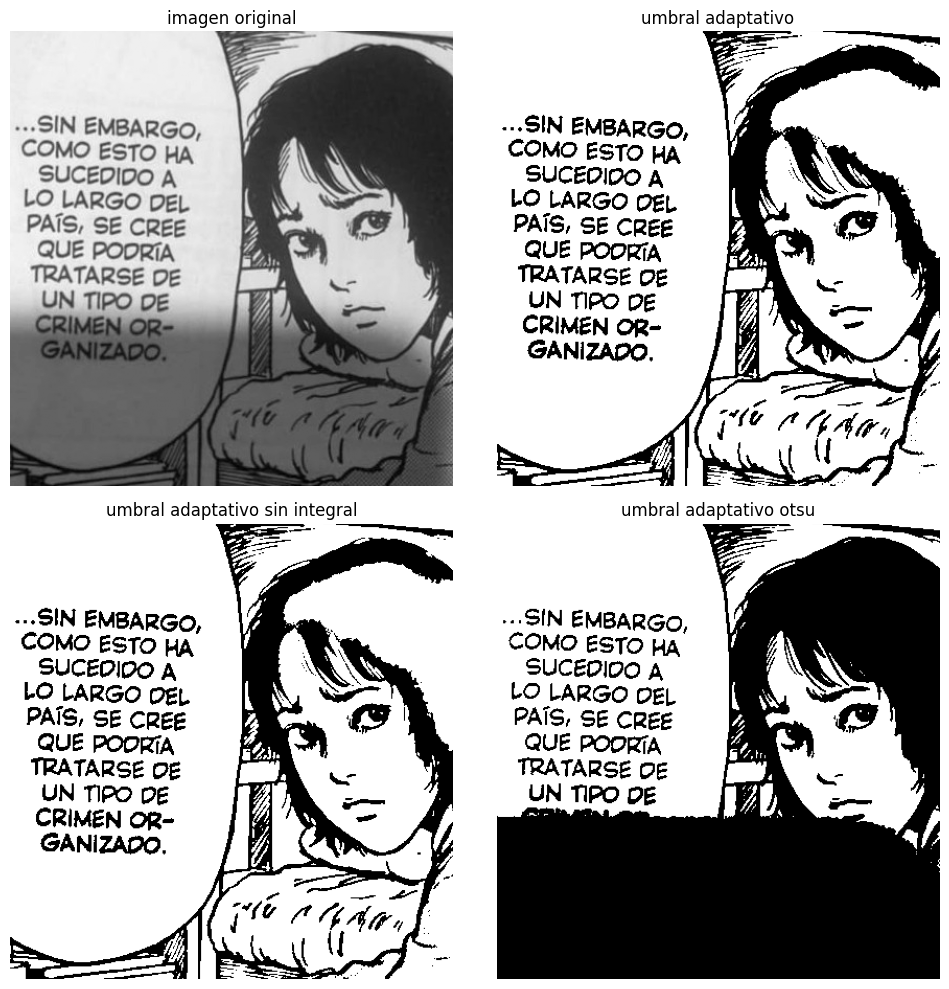

In [15]:
#aquí va la prueba con la matriz prueba

panel_chiquito = cv2.imread('panel_chiquito.jpg', cv2.IMREAD_GRAYSCALE)
print(f"El tamaño de la imagen panel_chiquito.jpg es: {panel_chiquito.shape} pixeles.")

tiempo_inicio = time()
imagen_integral_panel_chiquito = imagen_integral(panel_chiquito)
tiempo_final = time()
print(f"El tiempo que tarda la imagen integral de la imagen panel chiquito es: {tiempo_final - tiempo_inicio:.4f} segundos")
#print(imagen_integral_im2)
tiempo_inicio = time()
umbral_adaptativo_panel_chiquito = umbral_adaptativo_(panel_chiquito, imagen_integral_panel_chiquito, 15)
tiempo_final = time()
print(f"El tiempo que tarda el umbral adaptativo de la imagen panel chiquito es: {tiempo_final - tiempo_inicio:.4f} segundos")

tiempo_inicio = time()
sin_imagen_integral_panel_chiquito = umbral_adaptativo_sin_integral(panel_chiquito, 15)
tiempo_final = time()
print(f"El tiempo que tarda el umbral adaptativo sin imagen integral de la imagen panel chiquito es: {tiempo_final - tiempo_inicio:.4f} segundos")

tiempo_inicio = time()
otsu_val, otsu_img = cv2.threshold(panel_chiquito, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
tiempo_final = time()
print(f"El tiempo que tarda lel método de Otsu de la imagen panel chiquito es: {tiempo_final - tiempo_inicio:.4f} segundos")

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(panel_chiquito, cmap='gray')
plt.title("imagen original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(umbral_adaptativo_panel_chiquito, cmap='gray')
plt.title("umbral adaptativo")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sin_imagen_integral_panel_chiquito, cmap='gray')
plt.title("umbral adaptativo sin integral") 
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(otsu_img, cmap='gray')
plt.title("umbral adaptativo otsu")
plt.axis('off')

plt.tight_layout()
plt.show()

Para este siguiente ejemplo no se probó el umbral adaptativo sin imagen integral porque el tiempo de ejecución era demasiado largo por el tamaño de la imagen.

Sin embargo se dejó el código comentado por si se desea probar.

El tamaño de la imagen carta es: (1119, 1025) pixeles
El tiempo que tarda la imagen integral de la imagen carta es: 0.5199 segundos
El tiempo que tarda el umbral adaptativo de la imagen carta es: 2.6436 segundos
El tiempo que tarda lel método de Otsu de la imagen carta es: 0.0033 segundos


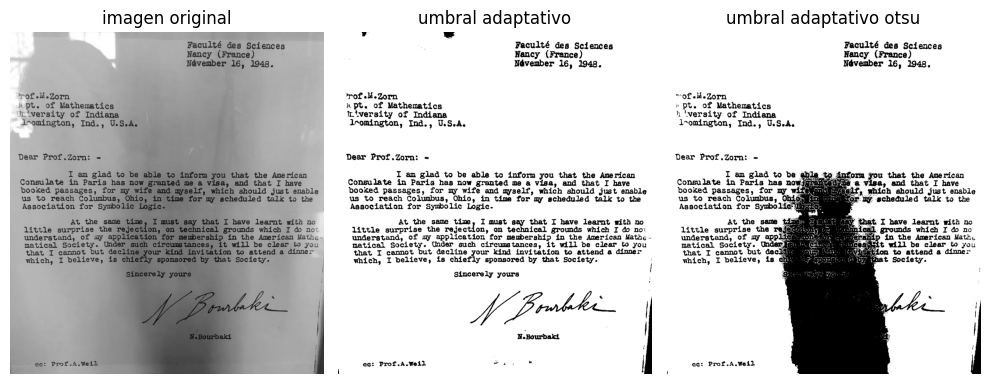

In [16]:
carta = cv2.imread('carta_de_un_dr.jpeg', cv2.IMREAD_GRAYSCALE)
print(f"El tamaño de la imagen carta es: {carta.shape} pixeles")

tiempo_inicio = time()
imagen_integral_carta = imagen_integral(carta)
tiempo_final = time()
print(f"El tiempo que tarda la imagen integral de la imagen carta es: {tiempo_final - tiempo_inicio:.4f} segundos")

tiempo_inicio = time()
umbral_adaptativo_carta = umbral_adaptativo_(carta, imagen_integral_carta, 15)
tiempo_final = time()
print(f"El tiempo que tarda el umbral adaptativo de la imagen carta es: {tiempo_final - tiempo_inicio:.4f} segundos")


#tiempo_inicio = time()
#sin_imagen_integral_carta = umbral_adaptativo_sin_integral(carta, 15)
#tiempo_final = time()
#print(f"El tiempo que tarda el umbral adaptativo sin imagen integral de la imagen carta es: {tiempo_final - tiempo_inicio:.4f} segundos")

tiempo_inicio = time()
otsu_val, otsu_img = cv2.threshold(carta, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
tiempo_final = time()
print(f"El tiempo que tarda lel método de Otsu de la imagen carta es: {tiempo_final - tiempo_inicio:.4f} segundos")

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(carta, cmap='gray')
plt.title("imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(umbral_adaptativo_carta, cmap='gray')
plt.title("umbral adaptativo")
plt.axis('off')

#plt.subplot(2, 2, 3)
#plt.imshow(sin_imagen_integral_carta, cmap='gray')
#plt.title("umbral adaptativo sin integral")
#plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu_img, cmap='gray')
plt.title("umbral adaptativo otsu")
plt.axis('off')

plt.tight_layout()
plt.show()

El tamaño de la imagen im2.png es: (375, 450) pixeles
El tiempo que tarda la imagen integral de la imagen im2 es: 0.0950 segundos
El tiempo que tarda el umbral adaptativo de la imagen im2 es: 0.3040 segundos
El tiempo que tarda el umbral adaptativo sin integral de la imagen im2 es: 109.5722 segundos
El tiempo que tarda el método de Otsu en la imagen im2 es: 0.0010 segundos


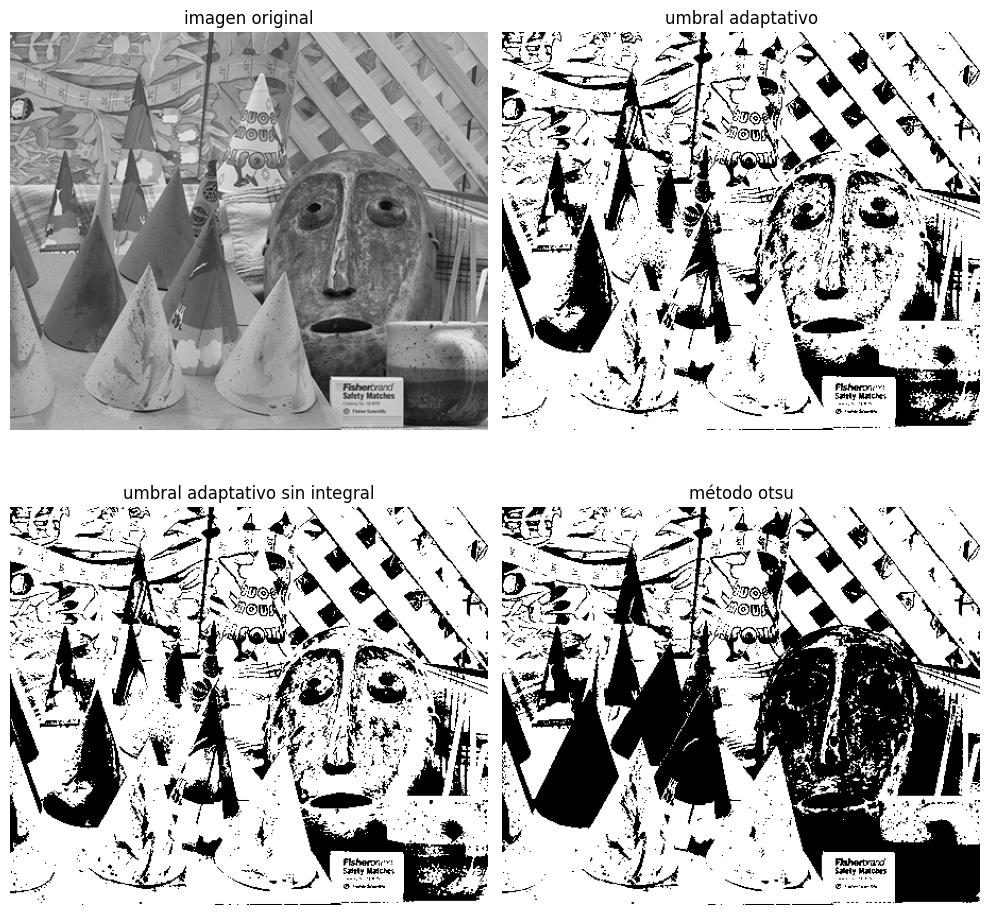

In [17]:
print(f"El tamaño de la imagen im2.png es: {img.shape} pixeles")
time_inicio = time()
imagen_integral_im2 = imagen_integral(img)
time_final = time()
print(f"El tiempo que tarda la imagen integral de la imagen im2 es: {time_final - time_inicio:.4f} segundos")

time_inicio = time()
umbral_adaptativo_im2 = umbral_adaptativo_(img, imagen_integral_im2, 15)
time_final = time()
print(f"El tiempo que tarda el umbral adaptativo de la imagen im2 es: {time_final - time_inicio:.4f} segundos")

time_inicio = time()
sin_imagen_integral_im2 = umbral_adaptativo_sin_integral(img, 15)
time_final = time()
print(f"El tiempo que tarda el umbral adaptativo sin integral de la imagen im2 es: {time_final - time_inicio:.4f} segundos")

time_inicio = time()
otsu_val_im2, otsu_im2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
time_final = time()
print(f"El tiempo que tarda el método de Otsu en la imagen im2 es: {time_final - time_inicio:.4f} segundos")


plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("imagen original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(umbral_adaptativo_im2, cmap='gray')
plt.title("umbral adaptativo")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sin_imagen_integral_im2, cmap='gray')
plt.title("umbral adaptativo sin integral") 
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(otsu_im2, cmap='gray')
plt.title("método otsu")
plt.axis('off')

plt.tight_layout()
plt.show()